In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## This is auto sector stock market data downloaded from Yahoo Finance. We have selected four auto stocks: TATAMOTORS, TVSMOTORS, HEROMOTORS, and APOLLOTYRES.

# Requiremnts for the analysis of these data
**1. Historical Stock Prices:**

Collect historical stock prices for TATAMOTORS, TVSMOTORS, HEROMOTORS, and APOLLOTYRES. This data will allow us to observe trends over time and identify any significant price movements.

**2. Financial Statements:**

Gather financial statements for each company, including balance sheets, income statements, and cash flow statements. These statements will provide insights into the financial health, revenue, and profitability of each company.

**3. Monthly Returns:**

Monthly returns measure the percentage change in the value of a stock over a one-month period.

**4. Total Revenue:**

Extract the total revenue from the financial statements for each company for each year.

**5. EBIT (Earnings Before Interest and Taxes) Analysis:**

Calculate the EBIT margin for each company. EBIT margin is the ratio of EBIT to total revenue and can be used to assess the operating profitability of each company.

In [12]:
!pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 38.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.0-cp310-cp310-linux_x86_64.whl size=290462 sha256=3adeb56d296c09c6ec353413f9b49fad65d5f5135a5ef075bb686ae55309feb2
  Stored in directory: /root/.cache/pip/wheels/c7/70/ad/212867e96e7004265a69c4aa5dcff00a95f547a67ba26e7e76
Successfully built peewee


In [13]:
import yfinance as yf

# **Auto Stock(Auto sector Stock )** - **Fetching Data by using tickers** 

In [17]:
tickers=["TATAMOTORS.NS", "TVSMOTOR.NS" ,"APOLLOTYRE.NS" ,"HEROMOTOCO.NS"]

In [23]:
stock=yf.download(tickers,period="2y",actions=True,group_by="Ticker",interval="1mo")
df=pd.DataFrame(stock)

[*********************100%%**********************]  4 of 4 completed


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2021-12-01 to 2023-11-01
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (APOLLOTYRE.NS, Open)          24 non-null     float64
 1   (APOLLOTYRE.NS, High)          24 non-null     float64
 2   (APOLLOTYRE.NS, Low)           24 non-null     float64
 3   (APOLLOTYRE.NS, Close)         24 non-null     float64
 4   (APOLLOTYRE.NS, Adj Close)     24 non-null     float64
 5   (APOLLOTYRE.NS, Volume)        24 non-null     int64  
 6   (APOLLOTYRE.NS, Dividends)     24 non-null     float64
 7   (APOLLOTYRE.NS, Stock Splits)  24 non-null     float64
 8   (TATAMOTORS.NS, Open)          24 non-null     float64
 9   (TATAMOTORS.NS, High)          24 non-null     float64
 10  (TATAMOTORS.NS, Low)           24 non-null     float64
 11  (TATAMOTORS.NS, Close)         24 non-null     float64
 12  (TATAMOTORS.NS, Adj Close)     2

In [29]:
df.describe()

APOLLOTYRE.NS                                                  \
               Open        High         Low       Close   Adj Close   
count     24.000000   24.000000   24.000000   24.000000   24.000000   
mean     290.747916  313.668750  276.358335  298.166665  296.858206   
std       78.820301   79.129114   80.279568   79.222987   80.498974   
min      184.699997  194.899994  165.250000  184.699997  181.260712   
25%      218.687500  229.000000  195.612503  218.949997  214.872955   
50%      303.100006  321.425003  286.675003  314.900009  314.529144   
75%      352.337494  390.275002  349.625000  371.812492  371.812492   
max      433.750000  440.899994  394.049988  432.799988  432.290253   

                                            TATAMOTORS.NS              ...  \
             Volume  Dividends Stock Splits          Open        High  ...   
count  2.400000e+01  24.000000         24.0     24.000000   24.000000  ...   
mean   6.045941e+07   0.156250          0.0    485.191668  516.247918  ...   
std    2.588672e+07   0.666808          0.0     78.728902   85.639266  ...   
min    4.454505e+06   0.000000          0.0    392.500000  417.649994  ...   
25%    4.296081e+07   0.000000          0.0    431.250000  453.474991  ...   
50%    5.825241e+07   0.000000          0.0    455.424988  481.199997  ...   
75%    7.832307e+07   0.000000          0.0    512.875000  552.612518  ...   
max    1.191762e+08   3.250000          0.0    645.000000  677.799988  ...   

      HEROMOTOCO.NS               TVSMOTOR.NS                            \
          Dividends Stock Splits         Open         High          Low   
count     24.000000         24.0    24.000000    24.000000    24.000000   
mean       9.583333          0.0  1020.245834  1097.912506   976.649999   
std       22.598416          0.0   301.725598   309.777425   306.670574   
min        0.000000          0.0   610.000000   627.849976   513.000000   
25%        0.000000          0.0   725.199997   824.937500   691.787491   
50%        0.000000          0.0  1050.424988  1124.250000   988.299988   
75%        0.000000          0.0  1184.012512  1333.950012  1170.287537   
max       70.000000          0.0  1592.000000  1634.000000  1554.500000   

                                                                       
             Close    Adj Close        Volume  Dividends Stock Splits  
count    24.000000    24.000000  2.400000e+01  24.000000         24.0  
mean   1057.697922  1054.399406  3.161277e+07   0.364583          0.0  
std     315.115750   317.309919  1.273259e+07   1.248867          0.0  
min     606.299988   599.607788  3.605958e+06   0.000000          0.0  
25%     815.600006   811.595474  2.444634e+07   0.000000          0.0  
50%    1062.674988  1058.999756  2.851348e+07   0.000000          0.0  
75%    1308.512543  1308.512543  3.871065e+07   0.000000          0.0  
max    1599.099976  1599.099976  6.338953e+07   5.000000          0.0  

[8 rows x 32 columns]

In [30]:
df.head()

APOLLOTYRE.NS                                                  \
                    Open        High         Low       Close   Adj Close   
Date                                                                       
2021-12-01    205.250000  222.100006  197.800003  219.149994  215.069229   
2022-01-01    220.199997  245.000000  205.500000  216.649994  212.615768   
2022-02-01    218.750000  230.500000  176.449997  184.699997  181.260712   
2022-03-01    184.699997  194.899994  165.250000  191.000000  187.443405   
2022-04-01    191.100006  214.000000  187.000000  205.000000  201.182724   

                                            TATAMOTORS.NS              ...  \
              Volume Dividends Stock Splits          Open        High  ...   
Date                                                                   ...   
2021-12-01  44726824       0.0          0.0    467.850006  506.399994  ...   
2022-01-01  60116212       0.0          0.0    493.500000  528.500000  ...   
2022-02-01  85731293       0.0          0.0    508.000000  514.750000  ...   
2022-03-01  79291166       0.0          0.0    454.049988  458.500000  ...   
2022-04-01  74037100       0.0          0.0    434.000000  462.700012  ...   

           HEROMOTOCO.NS              TVSMOTOR.NS                          \
               Dividends Stock Splits        Open        High         Low   
Date                                                                        
2021-12-01           0.0          0.0  689.799988  708.799988  590.000000   
2022-01-01           0.0          0.0  625.000000  670.599976  585.049988   
2022-02-01          60.0          0.0  610.000000  681.599976  606.599976   
2022-03-01           0.0          0.0  617.599976  627.849976  513.000000   
2022-04-01           0.0          0.0  621.299988  693.700012  619.000000   

                                                                     
                 Close   Adj Close    Volume Dividends Stock Splits  
Date                                                                 
2021-12-01  627.000000  620.079285  45585627      0.00          0.0  
2022-01-01  606.299988  599.607788  28518111      0.00          0.0  
2022-02-01  617.599976  610.783020  57088165      0.00          0.0  
2022-03-01  625.650024  618.744202  32557006      3.75          0.0  
2022-04-01  654.849976  651.634705  32155072      0.00          0.0  

[5 rows x 32 columns]

In [31]:
df.index

DatetimeIndex(['2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01',
               '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [32]:
df.columns

MultiIndex([('APOLLOTYRE.NS',         'Open'),
            ('APOLLOTYRE.NS',         'High'),
            ('APOLLOTYRE.NS',          'Low'),
            ('APOLLOTYRE.NS',        'Close'),
            ('APOLLOTYRE.NS',    'Adj Close'),
            ('APOLLOTYRE.NS',       'Volume'),
            ('APOLLOTYRE.NS',    'Dividends'),
            ('APOLLOTYRE.NS', 'Stock Splits'),
            ('TATAMOTORS.NS',         'Open'),
            ('TATAMOTORS.NS',         'High'),
            ('TATAMOTORS.NS',          'Low'),
            ('TATAMOTORS.NS',        'Close'),
            ('TATAMOTORS.NS',    'Adj Close'),
            ('TATAMOTORS.NS',       'Volume'),
            ('TATAMOTORS.NS',    'Dividends'),
            ('TATAMOTORS.NS', 'Stock Splits'),
            ('HEROMOTOCO.NS',         'Open'),
            ('HEROMOTOCO.NS',         'High'),
            ('HEROMOTOCO.NS',          'Low'),
            ('HEROMOTOCO.NS',        'Close'),
            ('HEROMOTOCO.NS',    'Adj Close'),
            (

# Close Price four Auto Stock (TATAMOTORS,TVSMOTORS,HEROMOTORS,APOLLOMOTORS)

In [33]:
df1=yf.download(tickers,period="1y",actions=True ,interval="1D").Close
df1

[*********************100%%**********************]  4 of 4 completed


,APOLLOTYRE.NS,HEROMOTOCO.NS,TATAMOTORS.NS,TVSMOTOR.NS
Date,,,,
2022-11-03,286.450012,2646.350098,416.250000,1134.650024
2022-11-04,288.899994,2588.899902,425.350006,1114.150024
2022-11-07,300.750000,2621.050049,435.000000,1112.750000
2022-11-09,295.799988,2651.500000,433.149994,1144.750000
2022-11-10,293.850006,2712.500000,412.200012,1105.949951
...,...,...,...,...
2023-10-30,374.149994,3110.350098,628.500000,1608.800049
2023-10-31,381.299988,3088.350098,628.650024,1590.800049
2023-11-01,380.700012,3092.449951,627.700012,1560.849976


<Figure size 1000x3000 with 0 Axes>

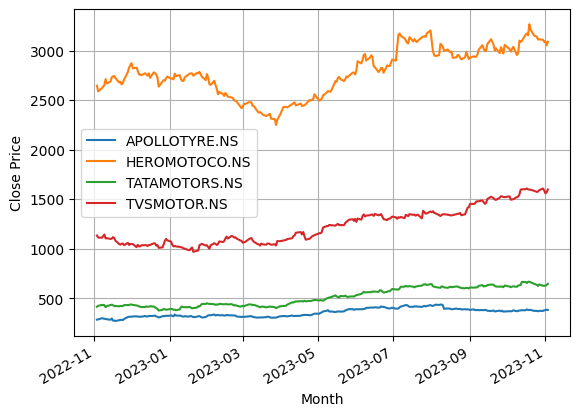

In [34]:
figure(figsize=(10,30))
df1.plot()
plt.legend()
plt.xlabel("Month")
plt.ylabel("Close Price")
plt.grid()
plt.show()

In [35]:
stock=yf.download(tickers,period="1mo",actions=True,group_by="Ticker")
df=pd.DataFrame(stock)
df

[*********************100%%**********************]  4 of 4 completed


HEROMOTOCO.NS                                                      \
                    Open         High          Low        Close    Adj Close   
Date                                                                           
2023-10-03   3058.000000  3064.899902  2991.500000  3015.600098  3015.600098   
2023-10-04   3015.949951  3020.000000  2976.050049  2989.050049  2989.050049   
2023-10-05   3020.000000  3048.850098  2993.399902  3016.649902  3016.649902   
2023-10-06   3040.000000  3045.000000  3022.500000  3038.000000  3038.000000   
2023-10-09   3021.100098  3049.949951  2923.949951  2955.100098  2955.100098   
2023-10-10   2975.000000  3003.100098  2966.000000  2976.800049  2976.800049   
2023-10-11   3000.000000  3111.000000  2987.550049  3100.850098  3100.850098   
2023-10-12   3116.949951  3132.100098  3064.949951  3088.250000  3088.250000   
2023-10-13   3084.000000  3119.000000  3080.050049  3098.449951  3098.449951   
2023-10-16   3104.000000  3174.300049  3099.850098  3161.000000  3161.000000   
2023-10-17   3182.100098  3187.550049  3166.500000  3172.949951  3172.949951   
2023-10-18   3170.000000  3184.000000  3149.000000  3153.149902  3153.149902   
2023-10-19   3149.500000  3275.000000  3138.050049  3265.850098  3265.850098   
2023-10-20   3260.000000  3265.000000  3203.550049  3211.250000  3211.250000   
2023-10-23   3205.550049  3232.750000  3139.449951  3149.850098  3149.850098   
2023-10-25   3150.000000  3171.000000  3090.000000  3140.850098  3140.850098   
2023-10-26   3129.000000  3130.050049  3085.000000  3111.949951  3111.949951   
2023-10-27   3125.199951  3152.899902  3104.050049  3112.199951  3112.199951   
2023-10-30   3112.250000  3128.550049  3055.000000  3110.350098  3110.350098   
2023-10-31   3115.050049  3139.600098  3080.149902  3088.350098  3088.350098   
2023-11-01   3095.949951  3144.649902  3075.550049  3092.449951  3092.449951   
2023-11-02   3139.000000  3149.949951  3041.500000  3052.100098  3052.100098   
2023-11-03   3085.000000  3110.199951  3072.050049  3089.399902  3089.399902   

                                           TATAMOTORS.NS              ...  \
             Volume Dividends Stock Splits          Open        High  ...   
Date                                                                  ...   
2023-10-03   387906       0.0          0.0    632.599976  632.650024  ...   
2023-10-04   307263       0.0          0.0    620.799988  620.799988  ...   
2023-10-05   537209       0.0          0.0    619.000000  621.349976  ...   
2023-10-06   180660       0.0          0.0    627.000000  627.349976  ...   
2023-10-09   976306       0.0          0.0    620.799988  622.000000  ...   
2023-10-10   467743       0.0          0.0    620.000000  632.500000  ...   
2023-10-11  1048795       0.0          0.0    633.000000  637.799988  ...   
2023-10-12   927642       0.0          0.0    637.000000  640.200012  ...   
2023-10-13   374642       0.0          0.0    633.950012  669.000000  ...   
2023-10-16   966651       0.0          0.0    668.549988  677.799988  ...   
2023-10-17   416816       0.0          0.0    670.000000  670.900024  ...   
2023-10-18   344063       0.0          0.0    658.599976  672.250000  ...   
2023-10-19  1129769       0.0          0.0    662.950012  672.299988  ...   
2023-10-20   458086       0.0          0.0    666.650024  676.400024  ...   
2023-10-23   313646       0.0          0.0    663.650024  667.250000  ...   
2023-10-25   391029       0.0          0.0    650.000000  651.900024  ...   
2023-10-26   461475       0.0          0.0    635.000000  635.650024  ...   
2023-10-27   314423       0.0          0.0    630.000000  643.950012  ...   
2023-10-30   265215       0.0          0.0    643.799988  643.799988  ...   
2023-10-31   207132       0.0          0.0    642.000000  642.000000  ...   
2023-11-01   473455       0.0          0.0    630.000000  633.799988  ...   
2023-11-02  1268028       0.0          0.0    632.000000  638.200012  ...   
2023-

**Weekly data of auto sector**

In [36]:
weeklydata=stock.resample("1W").mean()
weeklydata

HEROMOTOCO.NS                                                      \
                    Open         High          Low        Close    Adj Close   
Date                                                                           
2023-10-08   3033.487488  3044.687500  2995.862488  3014.825012  3014.825012   
2023-10-15   3039.410010  3083.030029  3004.500000  3043.890039  3043.890039   
2023-10-22   3173.120020  3217.170020  3151.390039  3192.839990  3192.839990   
2023-10-29   3152.437500  3171.674988  3104.625000  3128.712524  3128.712524   
2023-11-05   3109.450000  3134.589990  3064.850000  3086.530029  3086.530029   

                                             TATAMOTORS.NS              ...  \
               Volume Dividends Stock Splits          Open        High  ...   
Date                                                                    ...   
2023-10-08  353259.50       0.0          0.0    624.849991  625.537491  ...   
2023-10-15  759025.60       0.0          0.0    628.950000  640.300000  ...   
2023-10-22  663077.00       0.0          0.0    665.350000  673.930005  ...   
2023-10-29  370143.25       0.0          0.0    644.662506  649.687515  ...   
2023-11-05  525104.20       0.0          0.0    641.959998  644.759998  ...   

           TVSMOTOR.NS              APOLLOTYRE.NS                          \
             Dividends Stock Splits          Open        High         Low   
Date                                                                        
2023-10-08         0.0          0.0    371.825005  375.525002  368.775002   
2023-10-15         0.0          0.0    376.469995  380.069995  373.350000   
2023-10-22         0.0          0.0    384.700000  387.779999  379.829999   
2023-10-29         0.0          0.0    376.500000  378.987495  370.662506   
2023-11-05         0.0          0.0    382.659998  385.370001  378.390002   

                                                                      
                 Close   Adj Close     Volume Dividends Stock Splits  
Date                                                                  
2023-10-08  373.799995  373.799995  1994013.5       0.0          0.0  
2023-10-15  377.039996  377.039996  2134641.6       0.0          0.0  
2023-10-22  384.450000  384.450000  3484128.2       0.0          0.0  
2023-10-29  374.012505  374.012505  1179709.0       0.0          0.0  
2023-11-05  381.569995  381.569995  1031394.2       0.0          0.0  

[5 rows x 32 columns]

In [37]:
df2=yf.download(tickers,period="2y",actions=True ,interval="1D").Open
df2

[*********************100%%**********************]  4 of 4 completed


,APOLLOTYRE.NS,HEROMOTOCO.NS,TATAMOTORS.NS,TVSMOTOR.NS
Date,,,,
2021-11-03,223.600006,2697.000000,483.799988,700.000000
2021-11-04,222.750000,2650.000000,489.799988,712.000000
2021-11-08,223.000000,2707.699951,493.899994,709.000000
2021-11-09,229.199997,2694.949951,505.000000,755.000000
2021-11-10,229.949997,2714.000000,506.250000,731.450012
...,...,...,...,...
2023-10-30,377.899994,3112.250000,643.799988,1584.449951
2023-10-31,376.549988,3115.050049,642.000000,1634.000000
2023-11-01,383.850006,3095.949951,630.000000,1592.000000


<Figure size 1000x3000 with 0 Axes>

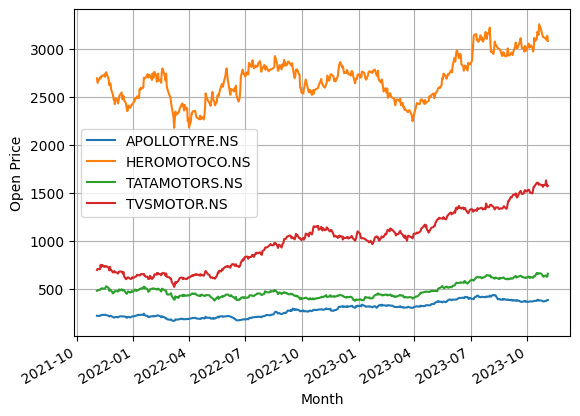

In [38]:
figure(figsize=(10,30))
df2.plot()
plt.legend()
plt.xlabel("Month")
plt.ylabel("Open Price")
plt.grid()
plt.show()

## ****Trends of Stock Price Over Time****

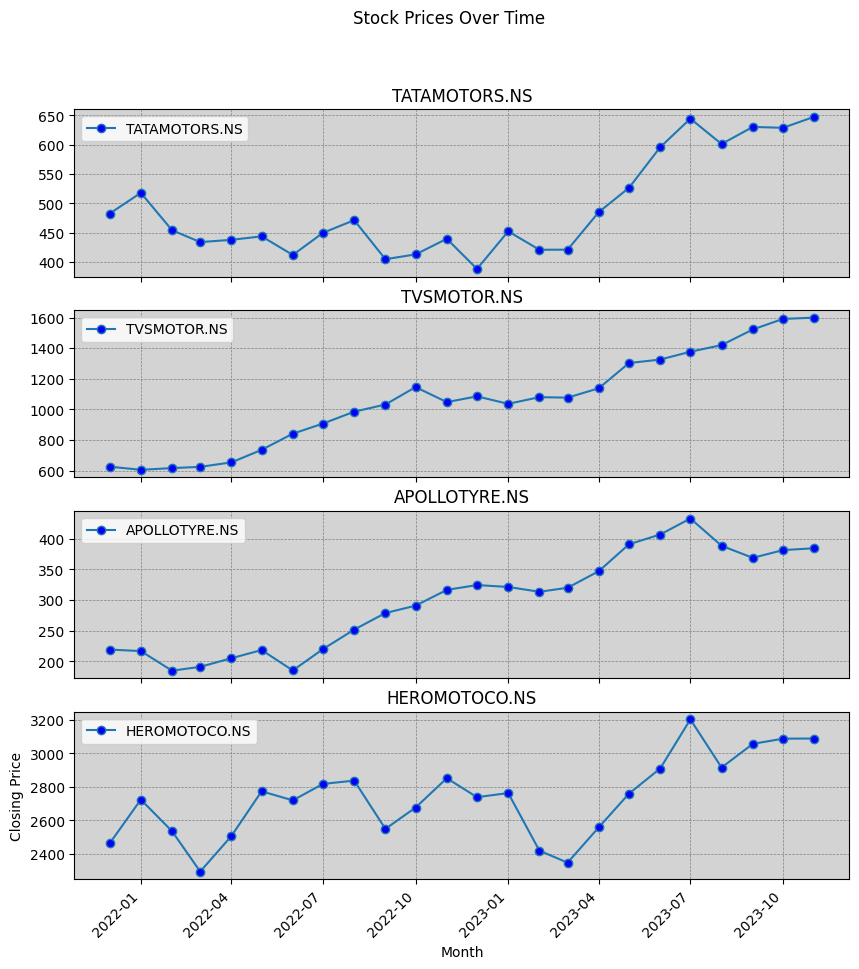

In [24]:
# Create subplots
fig, axes = plt.subplots(nrows=len(tickers), ncols=1, figsize=(10, 10), sharex=True)

# Plot each stock on a separate subplot
for i, ticker in enumerate(tickers):
    axes[i].plot(stock[ticker]['Close'], label=ticker,marker='o',markerfacecolor='blue')
    axes[i].set_title(ticker)
    axes[i].legend()
    axes[i].grid(color='gray', linestyle='--', linewidth=0.5)
    axes[i].set_facecolor('lightgray') 

# Set common labels and title
plt.xlabel("Month")
plt.ylabel("Closing Price")
plt.suptitle("Stock Prices Over Time")
plt.xticks(rotation=45, ha='right')

plt.show()


## Candelstick Chart

In [22]:
# Iterate through each ticker
for ticker in tickers:
    # Get data for the current ticker
    df = stock[ticker].reset_index()

    # Create a candlestick trace
    candlestick_trace = go.Candlestick(x=df['Date'],
                                       open=df['Open'],
                                       high=df['High'],
                                       low=df['Low'],
                                       close=df['Close'],
                                       name=f'{ticker} Candlestick')

    # Create a figure
    fig = go.Figure(data=[candlestick_trace])

    # Set layout
    fig.update_layout(title=f'{ticker} Candlestick Chart',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      xaxis_rangeslider_visible=False,
                      plot_bgcolor='lightgray',
                      paper_bgcolor='lightgray')

    # Show the figure
    fig.show()

## **Monthly Returns**

In [175]:
stock1=yf.download(tickers,period="2y",actions=True,group_by="Ticker")
# Create an empty DataFrame to store monthly returns
monthly_returns = pd.DataFrame()

# Iterate through each ticker
for ticker in tickers:
    # Extract adjusted closing prices for the current ticker
    adj_close = stock1[ticker]['Adj Close']
    
    # Resample to monthly frequency and forward-fill missing values
    monthly_data = adj_close.resample('M').ffill()
    
    # Calculate monthly returns as percentages
    monthly_return = monthly_data.pct_change().dropna() * 100  # Multiply by 100 to convert to percentage
    
    # Assign the returns to the DataFrame with a column name as the ticker
    monthly_returns[ticker] = monthly_return

# Display the resulting DataFrame
monthly_returns





[*********************100%%**********************]  4 of 4 completed


,TATAMOTORS.NS,TVSMOTOR.NS,APOLLOTYRE.NS,HEROMOTOCO.NS
Date,,,,
2021-12-31,5.189706,-8.667154,7.137614,0.522591
2022-01-31,7.327945,-3.301432,-1.140770,10.649452
2022-02-28,-12.303239,1.863767,-14.747287,-4.874587
2022-03-31,-4.470869,1.931135,3.410940,-9.517056
2022-04-30,0.887609,4.667138,7.329841,9.262697
2022-05-31,1.359683,12.476145,6.512202,10.661640
2022-06-30,-7.158159,14.309960,-13.721095,-1.953922
2022-07-31,9.179221,7.850822,18.800641,6.264071
2022-08-31,4.782028,8.540273,14.461124,0.697296


In [42]:
# Create a comparison chart for each ticker
for ticker in tickers:
    fig = px.line(monthly_returns, x=monthly_returns.index, y=ticker,
                  labels={'index': 'Date', ticker: f'{ticker} Monthly Returns (%)'},
                  title=f'{ticker} Monthly Returns',
                  template='plotly_dark')

    # Show the interactive plot
    fig.show()

In [43]:
pip install yahoofinancials


Note: you may need to restart the kernel to use updated packages.


In [44]:
from yahoofinancials import YahooFinancials


# Financials Statement

In [74]:
# Specify the list of ticker symbols
tickers = ["TATAMOTORS.NS", "TVSMOTOR.NS", "APOLLOTYRE.NS", "HEROMOTOCO.NS"]

# Loop through each ticker and fetch income statement
for ticker_symbol in tickers:
    stock = yf.Ticker(ticker_symbol)
    income_statement = stock.financials
    print(f"\nIncome Statement for {ticker_symbol}:")
    print(income_statement)
    print("\n" + "="*50 + "\n")  # Just to separate the outputs for different tickers



Income Statement for TATAMOTORS.NS:
                                               2023-03-31       2022-03-31  \
Tax Effect Of Unusual Items             3672289273.437883     6930280000.0   
Tax Rate For Calcs                               0.230269              0.4   
Normalized EBITDA                          365486100000.0   245087200000.0   
Total Unusual Items                         15947800000.0    17325700000.0   
Total Unusual Items Excluding Goodwill      15947800000.0    17325700000.0   
...                                                   ...              ...   
Salaries And Wages                                    NaN   308183100000.0   
Gross Profit                              1194973300000.0   857534200000.0   
Cost Of Revenue                           2264696400000.0  1908232700000.0   
Total Revenue                             3459669700000.0  2765766900000.0   
Operating Revenue                         3459669700000.0  2765766900000.0   

                          

In [87]:
# Specify the list of ticker symbols
tickers = ["TATAMOTORS.NS", "TVSMOTOR.NS", "APOLLOTYRE.NS", "HEROMOTOCO.NS"]

# Loop through each ticker and fetch balance sheet
for ticker_symbol in tickers:
    stock = yf.Ticker(ticker_symbol)
    balance_sheet = stock.balance_sheet
    print(f"\nBalance Sheet for {ticker_symbol}:")
    print(balance_sheet)
    print("\n" + "="*50 + "\n")  # Just to separate the outputs for different tickers



Balance Sheet for TATAMOTORS.NS:
                                                      2023-03-31  \
Ordinary Shares Number                              3321424146.0   
Share Issued                                        3321424146.0   
Net Debt                                          177510100000.0   
Total Debt                                        192786900000.0   
Tangible Book Value                               195473700000.0   
...                                                          ...   
Cash Cash Equivalents And Short Term Investments   48128600000.0   
Other Short Term Investments                       36914300000.0   
Cash And Cash Equivalents                          11214300000.0   
Cash Equivalents                                  236140600000.0   
Cash Financial                                     82728900000.0   

                                                       2022-03-31  \
Ordinary Shares Number                               3829055161.0   
Share Issue

In [109]:
# Specify the list of ticker symbols
tickers = ["TATAMOTORS.NS", "TVSMOTOR.NS", "APOLLOTYRE.NS", "HEROMOTOCO.NS"]

# Loop through each ticker and fetch balance sheet
for ticker_symbol in tickers:
    stock = yf.Ticker(ticker_symbol)
    cash_flow = stock.cashflow
    print(f"\nBalance Sheet for {ticker_symbol}:")
    print(cash_flow)
    print("\n" + "="*50 + "\n")  # Just to separate the outputs for different tickers



Balance Sheet for TATAMOTORS.NS:
                                             2023-03-31      2022-03-31  \
Free Cash Flow                           172923300000.0   -8855900000.0   
Repayment Of Debt                       -634175200000.0 -459068000000.0   
Issuance Of Debt                         444405100000.0  484179800000.0   
Issuance Of Capital Stock                 37696000000.0   37685900000.0   
Capital Expenditure                     -180956800000.0 -151684200000.0   
...                                                 ...             ...   
Earnings Losses From Equity Investments             NaN     740600000.0   
Gain Loss On Investment Securities         -881700000.0   -7339600000.0   
Net Foreign Currency Exchange Gain Loss   37466100000.0   -8217200000.0   
Gain Loss On Sale Of Business                       NaN             NaN   
Net Income From Continuing Operations     26898700000.0 -112372200000.0   

                                             2021-03-31      2020

## **Total Revenue**

In [137]:
import yfinance as yf
import pandas as pd

# Specify the list of ticker symbols
tickers = ["TATAMOTORS.NS", "TVSMOTOR.NS", "APOLLOTYRE.NS", "HEROMOTOCO.NS"]

# Fetch the total revenue for each ticker
total_revenue = []
for ticker in tickers:
    stock = yf.Ticker(ticker)
    total_revenue.append(stock.financials.loc['Total Revenue'])

# Create a Pandas DataFrame to store the total revenue data
df = pd.DataFrame(total_revenue, index=tickers)

# Show the DataFrame
df




,2023-03-31,2022-03-31,2021-03-31,2020-03-31
TATAMOTORS.NS,3.459670e+12,2.765767e+12,2.481631e+12,2.594251e+12
TVSMOTOR.NS,3.197399e+11,2.132079e+11,1.727128e+11,1.683786e+11
APOLLOTYRE.NS,2.456813e+11,2.058081e+11,1.695461e+11,1.609649e+11
HEROMOTOCO.NS,3.415838e+11,2.897764e+11,3.045159e+11,2.881258e+11


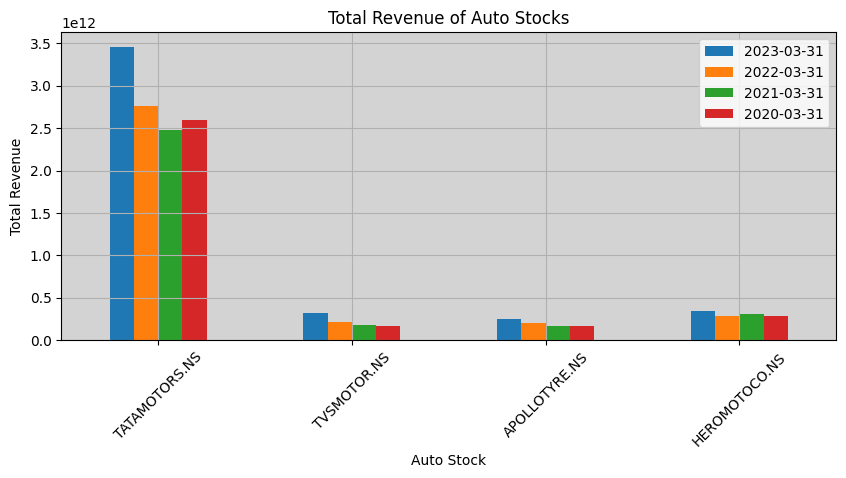

In [171]:
# Increase the figure size
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('lightgray')
# Plot a bar graph
df.plot(kind='bar', rot=45, legend=False, ax=ax)
plt.xlabel('Auto Stock')
plt.ylabel('Total Revenue')
plt.title('Total Revenue of Auto Stocks')
plt.legend(df.columns.astype(str))
plt.grid()
plt.show()

## **Earnings Before Interest and Taxes (EBIT)**

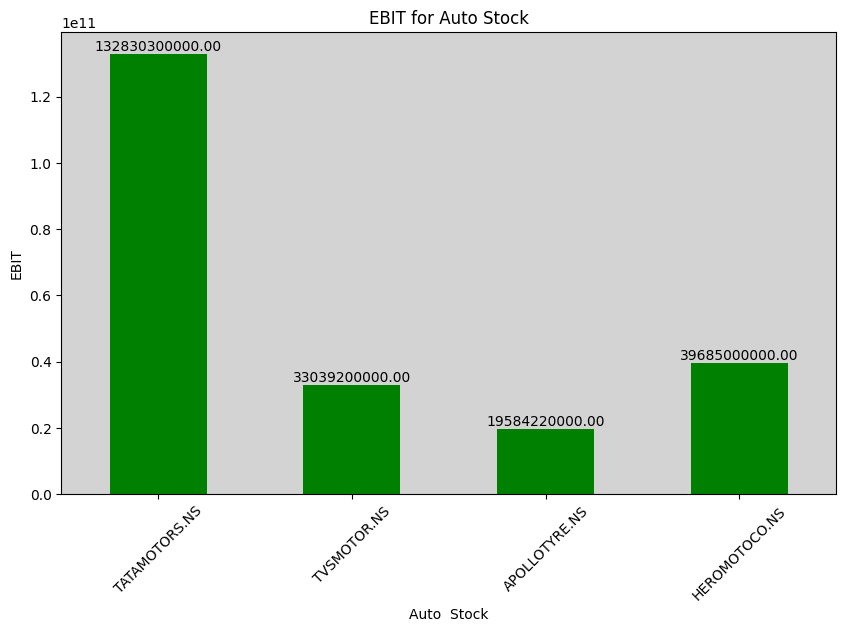

In [169]:

# Specify the list of ticker symbols
tickers = ["TATAMOTORS.NS", "TVSMOTOR.NS", "APOLLOTYRE.NS", "HEROMOTOCO.NS"]

# Fetch the EBIT for each ticker
ebit_values = []

for ticker in tickers:
    stock = yf.Ticker(ticker)
    financials = stock.financials
    ebit_values.append(financials.loc['EBIT'].iloc[0])

# Create a Pandas DataFrame to store the EBIT data
df_ebit = pd.DataFrame(ebit_values, index=tickers, columns=['EBIT'])

# Increase the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Set background color of the grid
ax.set_facecolor('lightgray')  # You can change the color code as needed

# Plot a bar graph for EBIT
df_ebit['EBIT'].plot(kind='bar', rot=45, ax=ax, color='green')
plt.xlabel('Auto  Stock')
plt.ylabel('EBIT')
plt.title('EBIT for Auto Stock')


# Add labels for each bar with data values
for i, v in enumerate(df_ebit['EBIT']):
    ax.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')

plt.show()
